# Waverose from Wave Data

This notebook is used to visualise the CAWCR Hindcast wave data as a waverose plot (Significant wave height and direction).

Key Notes:
- Python version 3.8.8
- Environment: base (root)
- Locations: Grassy Beach/Bay, King Island
- GitHub project: https://github.com/james-th94/NaturalShorelineVariability_Grassy

Last updated 7/10/22.

Steps: 
- Import packages required
- Add user inputs, including data file and figure settings
- Create a dataframe and variables from the data
- Plot the waverose, and save the figure.

#### IMPORT PACKAGES

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import cm # https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
from windrose import WindroseAxes # https://windrose.readthedocs.io/en/latest/api.html
# System check
import sys
print('Python version:', sys.version,
      '\nAnaconda environment:', sys.executable)

Python version: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)] 
Anaconda environment: c:\Users\s5245653\Anaconda3\envs\datasci\python.exe


#### IMPORT FUNCTIONS

In [2]:
def Month2Season(df):
    season_dict = {1: 'Summer', 2: 'Summer', 3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
                   6: 'Winter', 7: 'Winter', 8: 'Winter', 9: 'Spring', 10:'Spring',
                   11: 'Spring', 12: 'Summer'}
    season_val_dict = {'Summer': 1.0, 'Autumn': 2.0, 'Winter': 3.0, 'Spring': 4.0}
    df['Season'] = df['Month'].apply(lambda x: season_dict[x])
    df['Season_Val'] = df['Season'].apply(lambda x: season_val_dict[x])
    return df

#### USER INPUTS

In [37]:
# Set and Check Directory
projectDir = 'C:/Users/s5245653/OneDrive - Griffith University/Projects/NaturalShorelineVariability_Grassy/'
dataDir = 'data/MetOcean/'
outputDir = 'processed/'
inputDir = 'raw/'
plotDir = 'data/Plots/All/Waveroses/'
os.chdir(projectDir + dataDir)
os.getcwd()

# Data
waveData = projectDir + dataDir + inputDir + 'CAWCR_Waves/cawcr_aus_4m_KingIsland_SS_197901_202212_lon144.133560_lat-40.066616.csv'
headerRows2Skip = 31
headerRow = 0
idxCol = 'DateTime'

SAMData = projectDir + dataDir + inputDir + 'SAMIndex.csv'
SOIData = projectDir + dataDir + inputDir + 'soi_monthly.txt'

# For Subsetting
heightCol = 'hs'
directionCol = 'dir'
firstDate = dt.datetime(1987, 9, 1) # year, month, day
lastDate = dt.datetime(2020, 12, 31)

# Output
outputCSV = projectDir + dataDir + outputDir +'WaveDataAll_.csv'

In [90]:
# Plot Settings
# Waverose Settings
colorScale = cm.jet
binsRange = np.arange(0,3.5, step =0.5) # Controls the bins for the variable (e.g. Hs)
yRange = np.arange(10, 45, step=10) # Controls the percentage rings on the windrose
yTicks = []
yPos = 10 # degrees from x axis (anticlockwise)
for i in yRange:
    yTicks.append(str(i) + ' %')
sectors = 16
gap = 0.1 # value between 0 and 1 that defines the "gap" between rose sectors
edgeCol = 'grey'
compassValues = ['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE']

# General Settings
plt.rcParams['font.size'] = '24'
fontsizeSmall = 16

# Legend Settings
roundingDec = 1
legTitle = 'Hs (m)'
labelLoc = 'lower right'

# Figure Output
plotName = projectDir + plotDir + 'waverose_.jpg'
resolution = 600 # dpi

#### PROCESSING THE DATA

In [39]:
# Create dataframe from csv file
dfRaw = pd.read_csv(waveData, skiprows = headerRows2Skip, header = headerRow, index_col = idxCol)
dfRaw.head()

,hs,fp,tm0m1,dir,dp,spr,hs0,hs1,hs2,hs3,...,th1,th2,th3,si0,si1,si2,si3,U10,V10,CgE
DateTime,,,,,,,,,,,,,,,,,,,,,
01/01/1979 00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,1.4,0.0
01/01/1979 01:00,0.108,NaN,1.65,252.5,NaN,27.5,0.100,NaN,NaN,NaN,...,NaN,NaN,NaN,27.500000,NaN,NaN,NaN,5.6,1.4,0.0
01/01/1979 02:00,0.206,NaN,1.74,237.5,NaN,24.7,0.190,NaN,NaN,NaN,...,NaN,NaN,NaN,24.400000,NaN,NaN,NaN,5.8,2.3,0.1
01/01/1979 03:00,0.270,0.416,2.15,232.0,227.0,24.9,0.264,NaN,NaN,NaN,...,NaN,NaN,NaN,24.600000,NaN,NaN,NaN,6.2,2.3,0.1
01/01/1979 04:00,0.290,0.389,2.34,233.7,231.0,23.6,0.284,NaN,NaN,NaN,...,NaN,NaN,NaN,23.300001,NaN,NaN,NaN,7.0,2.4,0.1


In [ ]:
# Clean dataframe
df = dfRaw.replace(r'^\s*$', np.nan, regex=True) # replace all blank datacells with NaN

# Format DateTime and Truncate to Dates of Interest
df.index = pd.to_datetime(df.index, format = '%d/%m/%Y %H:%M')
df = df.truncate(before = firstDate, after = lastDate)

# Create Month Column
df['Month'] = df.index.month
Month2Season(df)

In [ ]:
df.loc[df['Season'] == 'Winter'].describe()

In [ ]:
# Options to view the data
#df.head()
#df.tail()
df.describe()
#df.dtypes()

#### PLOTTING

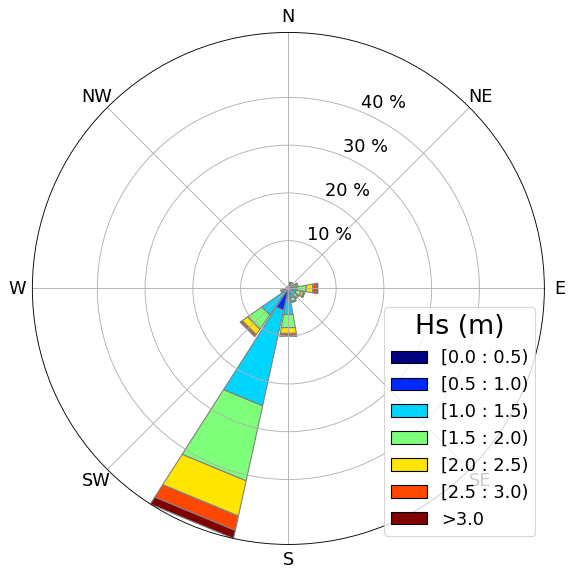

In [96]:
# PLOTTING WAVEROSE
ax = WindroseAxes.from_ax()
ax.bar(direction = df[directionCol], var = df[heightCol], bins = binsRange, nsector = sectors, 
       opening = 1.0 - gap, normed=True, edgecolor = edgeCol, cmap = colorScale)
# Plot a legend
ax.legend(title = legTitle, decimal_places = roundingDec, fontsize = fontsizeSmall, 
          loc = labelLoc)

# Fix the labelling
ax.set_xticklabels(compassValues, fontsize = fontsizeSmall)
ax.set_yticks(yRange)
ax.set_yticklabels(yTicks, fontsize = fontsizeSmall)

# Plot Figure
#plt.savefig(plotName, dpi = resolution, bbox_inches='tight')
plt.show()

### Split into Months, Seasons etc.

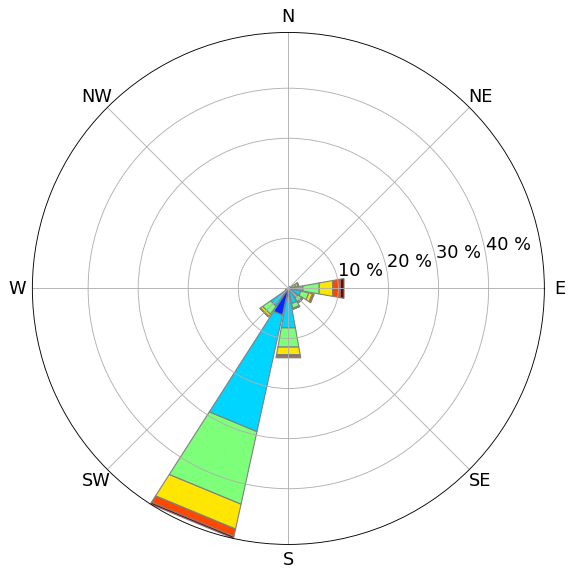

In [94]:
# PLOTTING SEASONAL WAVEROSE
def windRosePlotSeasonal(season = 'Winter'):
    ax = WindroseAxes.from_ax()
    ax.bar(direction = df.loc[df['Season'] == season, directionCol], var = df.loc[df['Season'] == season, heightCol], 
           bins = binsRange, nsector = sectors, opening = 1.0 - gap, normed=True, edgecolor = edgeCol, cmap = colorScale)

    # Plot a legend
    #ax.legend(title = legTitle, decimal_places = roundingDec, fontsize = fontsizeSmall, 
    #          loc = labelLoc)

    # Fix the labelling
    ax.set_xticklabels(compassValues, fontsize = fontsizeSmall)
    ax.set_yticks(yRange)
    ax.set_rlabel_position(yPos)
    ax.set_yticklabels(yTicks, fontsize = fontsizeSmall)

    plt.savefig(plotName, dpi = resolution, bbox_inches='tight')
    plt.show()
windRosePlotSeasonal(season = 'Summer')

In [53]:
def windRosePlot(directionVar = df[directionCol], heightVar = df[heightCol]):
    ax = WindroseAxes.from_ax()
    ax.bar(direction = directionVar, var = heightVar, bins = binsRange, nsector = sectors, 
           opening = 1.0 - gap, normed=True, edgecolor = edgeCol, cmap = colorScale)
    # Plot a legend
    ax.legend(title = legTitle, decimal_places = roundingDec, fontsize = fontsizeSmall, 
              loc = labelLoc)
    # Fix the labelling
    ax.set_xticklabels(compassValues, fontsize = fontsizeSmall)
    ax.set_yticks(yRange)
    ax.set_yticklabels(yTicks, fontsize = fontsizeSmall)
    # Plot Figure
    # plt.savefig(plotName, dpi = resolution, bbox_inches='tight')
    plt.show()

## Climate Index Data

In [56]:
# Southern Annular Mode, SAM
dfSAM = pd.read_csv(SAMData, index_col = idxCol)
# Format DateTime and Truncate to Dates of Interest
dfSAM.index = pd.to_datetime(dfSAM.index, format = '%d/%m/%Y')
dfSAM = dfSAM.truncate(before = firstDate, after = lastDate)

# Southern Oscillation Index, SOI
dfSOI = pd.read_csv(SOIData, index_col = idxCol)
# Format DateTime and Truncate to Dates of Interest
dfSOI.index = pd.to_datetime(dfSOI.index, format = '%Y%m')
dfSOI = dfSOI.truncate(before = firstDate, after = lastDate)

# Merge both climate index dataframes
dfSAMSOI = dfSAM.join(dfSOI)

# Create seasonally-averaged data
dfSAMSOI['Month'] = dfSAMSOI.index.month
Month2Season(dfSAMSOI)
dfSAMSOIave = dfSAMSOI.resample('3MS').mean()
dfSAMSOIave.head()

C:\Users\s5245653\AppData\Local\Temp\ipykernel_22616\316308105.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfSAMSOIave = dfSAMSOI.resample('3MS').mean()


,SAMI,SOI,Month,Season_Val
DateTime,,,,
1987-09-01,0.610000,-6.066667,10.0,4.0
1987-12-01,0.183333,-3.533333,5.0,1.0
1988-03-01,-0.643333,3.700000,4.0,2.0
1988-06-01,-1.473333,7.433333,7.0,3.0
1988-09-01,-2.320000,18.566667,10.0,4.0


In [57]:
df_ = df.copy(deep = True)
df_ = df_.reset_index()

dfAll = pd.merge(
    df_,
    dfSAMSOI[['SAMI', 'SOI']],
    left_on=[df_.DateTime.dt.month, df_.DateTime.dt.year],
    right_on=[dfSAMSOI.index.month, dfSAMSOI.index.year],
)

dfAll.index = dfAll['DateTime']
dfAll = dfAll.drop(['key_0', 'key_1', 'DateTime'], axis = 1)
#dfAll.to_csv(outputCSV) # Save dataframe to csv file!! :D

In [58]:
# Seasonal average of SAMSOI values
dfAllave = pd.merge(
    df_,
    dfSAMSOIave[['SAMI', 'SOI']],
    left_on=[df_.Season_Val, df_.DateTime.dt.year],
    right_on=[dfSAMSOIave.Season_Val, dfSAMSOIave.index.year],
)

dfAllave.index = dfAllave['DateTime']
dfAllave = dfAllave.drop(['key_0', 'key_1', 'DateTime'], axis = 1)

#### PLOTTING

In [89]:
# PLOTTING SEASONAL WAVEROSE
def windRosePlotSeasonalPos(df = dfAll, climateIdx = 'SAMI', season = 'Winter'):
    ax = WindroseAxes.from_ax()
    ax.bar(direction = df.loc[(df[climateIdx] >= 0) & (df['Season'] == season), directionCol], 
           var = df.loc[(df[climateIdx] >= 0) & (df['Season'] == season), heightCol], 
           bins = binsRange, nsector = sectors, opening = 1.0 - gap, normed=True, edgecolor = edgeCol, cmap = colorScale)

    # Plot a legend
    ax.legend(title = legTitle, decimal_places = roundingDec, fontsize = fontsizeSmall, 
              loc = labelLoc)

    # Fix the labelling
    ax.set_xticklabels(compassValues, fontsize = fontsizeSmall)
    ax.set_yticks(yRange)
    ax.set_yticklabels(yTicks, fontsize = fontsizeSmall)

    plt.savefig(plotName, dpi = resolution, bbox_inches='tight')
    plt.show()

In [63]:
def windRosePlotSeasonalNeg(df = dfAll, climateIdx = 'SAMI', season = 'Winter'):
    ax = WindroseAxes.from_ax()
    ax.bar(direction = df.loc[(df[climateIdx] < 0) & (df['Season'] == season), directionCol], 
           var = df.loc[(df[climateIdx] < 0) & (df['Season'] == season), heightCol], 
           bins = binsRange, nsector = sectors, opening = 1.0 - gap, normed=True, edgecolor = edgeCol, cmap = colorScale)

    # Plot a legend
    ax.legend(title = legTitle, decimal_places = roundingDec, fontsize = fontsizeSmall, 
              loc = labelLoc)

    # Fix the labelling
    ax.set_xticklabels(compassValues, fontsize = fontsizeSmall)
    ax.set_yticks(yRange)
    ax.set_yticklabels(yTicks, fontsize = fontsizeSmall)

    #plt.savefig(plotName, dpi = resolution, bbox_inches='tight')
    plt.show()

def windRosePlotSeasonalPos(df = dfAll, climateIdx = 'SAMI', season = 'Winter'):
    ax = WindroseAxes.from_ax()
    ax.bar(direction = df.loc[(df[climateIdx] > 0) & (df['Season'] == season), directionCol], 
           var = df.loc[(df[climateIdx] > 0) & (df['Season'] == season), heightCol], 
           bins = binsRange, nsector = sectors, opening = 1.0 - gap, normed=True, edgecolor = edgeCol, cmap = colorScale)

    # Plot a legend
    ax.legend(title = legTitle, decimal_places = roundingDec, fontsize = fontsizeSmall, 
              loc = labelLoc)

    # Fix the labelling
    ax.set_xticklabels(compassValues, fontsize = fontsizeSmall)
    ax.set_yticks(yRange)
    ax.set_yticklabels(yTicks, fontsize = fontsizeSmall)

    #plt.savefig(plotName, dpi = resolution, bbox_inches='tight')
    plt.show()

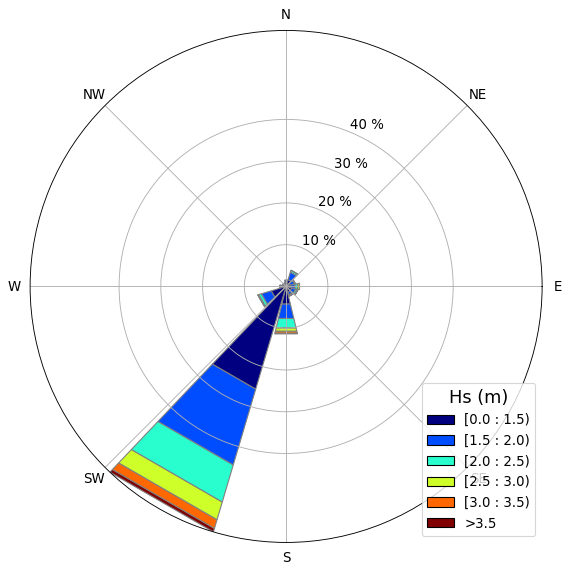

In [66]:
windRosePlotSeasonalPos(df = dfAllave, season = 'Winter')

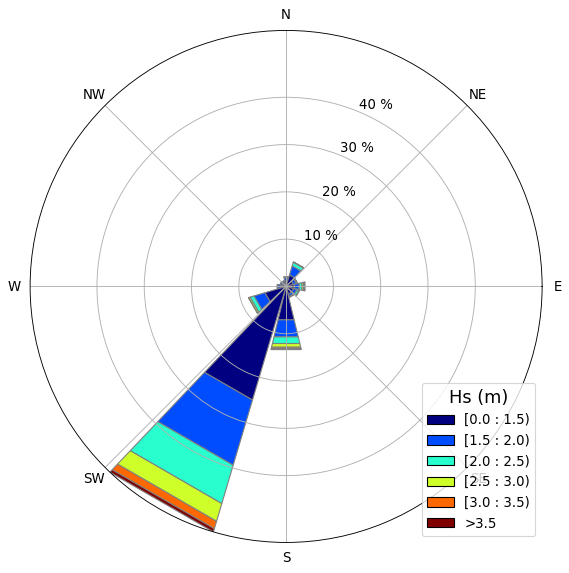

In [65]:
windRosePlotSeasonalNeg(df = dfAllave, season = 'Winter')

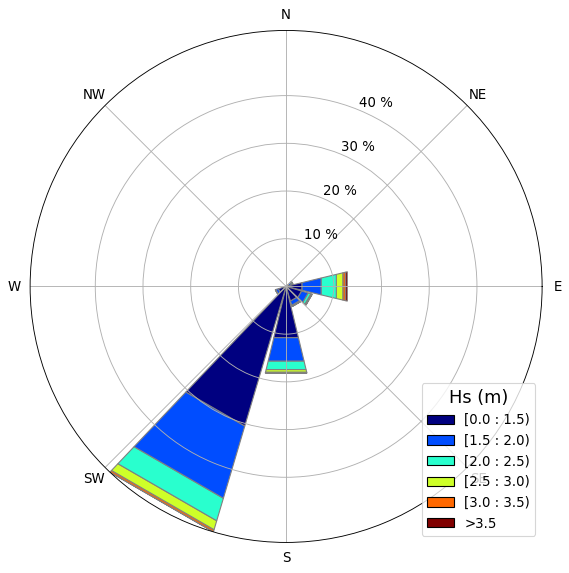

In [67]:
windRosePlotSeasonalNeg(df = dfAllave, season = 'Summer')

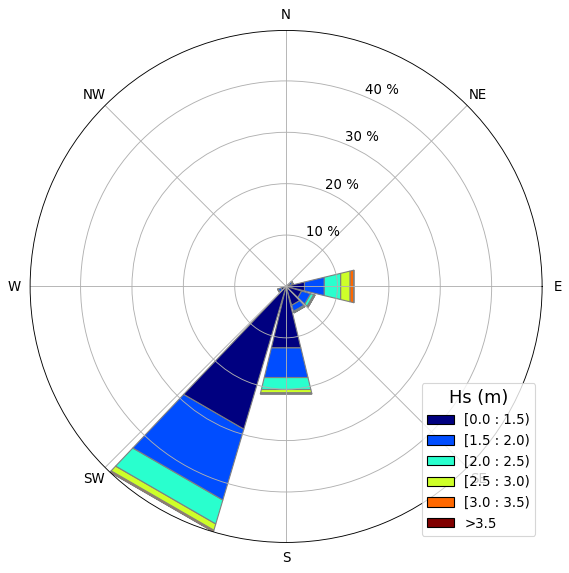

In [68]:
windRosePlotSeasonalPos(df = dfAllave, season = 'Summer')